In [3]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import scipy.integrate as spi
import scipy.optimize as opt

In [19]:
dates_ebola = []
countries_ebola = []
with open('ebola_sorted.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        countries_ebola.append(row[0])
        dates_ebola.append(row[4])

data = {
    'Country': countries_ebola,
    'Date Onset Inferred': dates_ebola
}

df = pd.DataFrame(data)
df = df[df['Date Onset Inferred'] != 'NA']
countries = df.groupby('Country')
df_guinea = countries.get_group('Guinea')
dates_guinea = [date for date in df_guinea['Date Onset Inferred']]
df_liberia = countries.get_group('Liberia')
dates_liberia = [date for date in df_liberia['Date Onset Inferred']]
df_sierra = countries.get_group('Sierra Leone')
dates_sierra = [date for date in df_sierra['Date Onset Inferred']]
def sort_dates(dates):
    def date_key(date_string):
        return datetime.strptime(date_string, '%d/%m/%Y')
    return sorted(dates, key=date_key)
dates_all = sort_dates(dates_all)
print(dates_all)

['26/12/2013', '26/12/2013', '01/01/2014', '01/01/2014', '01/01/2014', '01/01/2014', '06/01/2014', '06/01/2014', '11/01/2014', '15/01/2014', '20/01/2014', '25/01/2014', '26/01/2014', '29/01/2014', '01/02/2014', '02/02/2014', '03/02/2014', '03/02/2014', '04/02/2014', '04/02/2014', '07/02/2014', '09/02/2014', '11/02/2014', '15/02/2014', '16/02/2014', '17/02/2014', '18/02/2014', '19/02/2014', '21/02/2014', '21/02/2014', '23/02/2014', '23/02/2014', '24/02/2014', '24/02/2014', '24/02/2014', '25/02/2014', '25/02/2014', '27/02/2014', '27/02/2014', '28/02/2014', '28/02/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '02/03/2014', '02/03/2014', '03/03/2014', '03/03/2014', '03/03/2014', '03/03/2014', '03/03/2014', '05/03/2014', '06/03/2014', '07/03/2014', '07/03/2014', '07/03/2014', '07/03/2014', '08/03/2014', '09/03/2014', '10/03/2014', '10/03/2014', '10/03/2014', '11/0

In [94]:
def convert_date_to_number(date, earliest_date):
    """convert dates to numbers

    Args:
        date (str): String of a date, it should be in format "%d/%m/%Y" 
        earliest_date (str, optional): Date that has value 0. Defaults to "01/01/2011".

    Returns:
        int: Number of days after the earliest_date
    """
    date_format = "%d/%m/%Y" 
    delta = datetime.strptime(date, date_format) - datetime.strptime(earliest_date, date_format) 
    return delta.days + 1

date_nums_guinea = [convert_date_to_number(date, dates_guinea[0]) for date in dates_guinea]
date_nums_liberia = [convert_date_to_number(date, dates_liberia[0]) for date in dates_liberia]
date_nums_sierra = [convert_date_to_number(date, dates_sierra[0]) for date in dates_sierra]
date_nums_all = [convert_date_to_number(date, dates_all[0]) for date in dates_all]

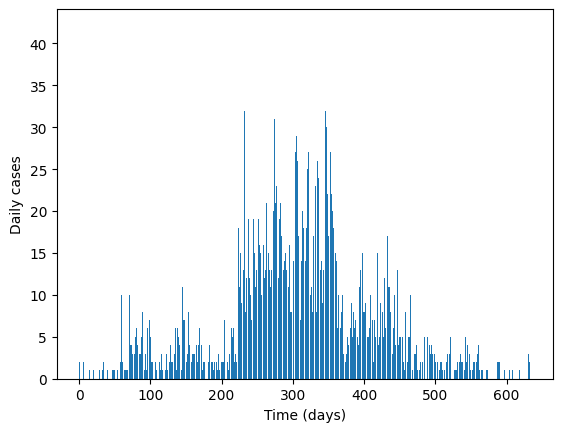

In [95]:
def daily_frequency(event_times):
    counter = Counter(event_times)
    keys = counter.keys()
    values = [counter[key] for key in keys]
    plt.bar(keys, values)
    plt.xlabel('Time (days)')
    plt.ylabel('Daily cases')

daily_frequency(date_nums_guinea)


In [96]:
def distribute(data):
    """Distribute cases in the same day evenly

    Args:
        data (List(int)): A list of event times

    Returns:
        List: Distributed event times
    """
    counter = Counter(data)
    sorted_elements = sorted(counter.keys())
    time_ticks = []
    for e in sorted_elements:
        count = counter[e]
        for n in range(count):
            time_ticks.append(int(e)-1+(n+1)/count)
        
    return time_ticks

In [97]:
observed_guinea = distribute(date_nums_guinea)
observed_liberia = distribute(date_nums_liberia)
observed_sierra = distribute(date_nums_sierra)
print(date_nums_guinea)
print(observed_guinea)

[1, 1, 6, 6, 11, 15, 20, 25, 29, 32, 33, 34, 34, 35, 35, 38, 40, 42, 47, 48, 49, 50, 52, 52, 54, 55, 55, 56, 56, 58, 58, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 62, 62, 64, 65, 66, 66, 66, 66, 67, 68, 69, 69, 69, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 73, 73, 73, 73, 74, 74, 74, 74, 75, 75, 75, 76, 77, 78, 78, 78, 79, 79, 79, 79, 79, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 85, 85, 85, 86, 86, 86, 87, 87, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 91, 91, 91, 92, 93, 93, 93, 95, 96, 96, 96, 96, 96, 96, 97, 97, 97, 97, 98, 98, 98, 98, 98, 98, 98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 100, 100, 100, 100, 100, 101, 101, 102, 102, 103, 103, 104, 104, 104, 105, 105, 107, 107, 108, 108, 108, 108, 109, 111, 112, 112, 113, 113, 114, 116, 116, 116, 117, 121, 122, 122, 122, 122, 123, 123, 123, 124, 125, 125, 125, 125, 126, 126, 127, 127, 128, 128, 128, 128, 129, 130, 130, 131, 131, 132, 134

## The Intensity Function

In [98]:
def binary_search(sorted_list, new):
    """Find the right position for a insertion"""
    left = 0
    right = len(sorted_list) - 1

    while left <= right:
        mid = (left + right) // 2
        if sorted_list[mid] == new:
            return mid
        elif sorted_list[mid] < new:
            left = mid + 1
        else:
            right = mid - 1
    return left

def history_n(t, event_times, n=50):
    """Reduce computations by ignoring all event times more than n days ago.
    Args:
        t: time
        n: number of days up to time t
        event_times (Iterable): event times 
    Returns:
        Iterable: all event times within n days of t
    """
    start = binary_search(event_times, t-n)
    end = binary_search(event_times,t)
    history_reduced = event_times[start:end]
    return history_reduced

In [99]:
def exponential_kernel(t, t_i, alpha, delta):
    return alpha*np.exp(-delta*(t-(t_i)))

def self_exciting_term(t, history, alpha, delta, dep=50):
    phi_sum = 0
    for t_i in history_n(t, history, dep):
        phi_sum += exponential_kernel(t, t_i, alpha, delta)
    return phi_sum

def intensity(t, history, alpha, delta, mu, dep=50):
    return mu + self_exciting_term(t, history, alpha, delta, dep)

Text(0.5, 1.0, 'Exponential kernel')

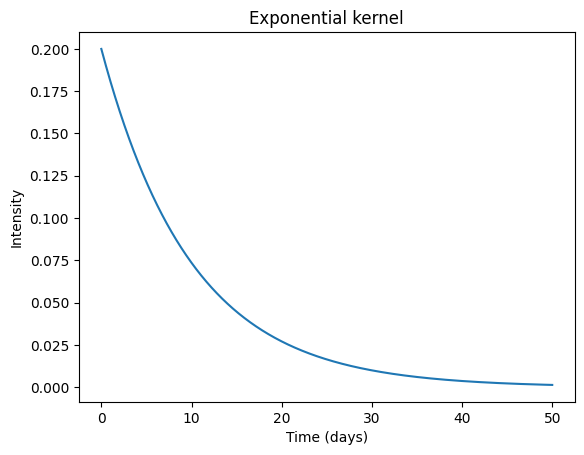

In [100]:
time50 = np.linspace(0,50,10000)
kernel_intensity = [exponential_kernel(t, 0, 0.2, 0.1) for t in time50]
plt.plot(time50, kernel_intensity)
plt.xlabel("Time (days)")
plt.ylabel("Intensity")
plt.title("Exponential kernel")

Text(0.5, 1.0, 'Intensity function, Guinea, Example parameters')

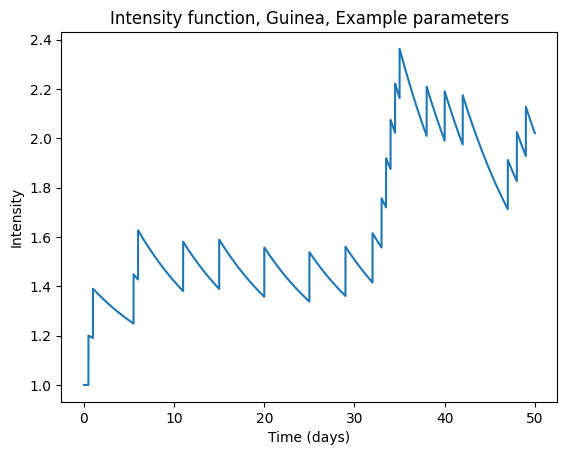

In [101]:
kernel_intensity = [intensity(t, observed_guinea, 0.2, 0.1, 1) for t in time50]
plt.plot(time50, kernel_intensity)
plt.xlabel("Time (days)")
plt.ylabel("Intensity")
plt.title("Intensity function, Guinea, Example parameters")

## MLE Estimation

In [114]:
#Integral term of log likelihood
def integral_slices(parameters, event_times, t):
    alpha, delta, mu = parameters
    integral_slices = []
    end = binary_search(event_times,t)
    event_times_t = event_times[:end]
    integral_intervals = [0] + event_times_t + [t]
    for ind in range(len(integral_intervals)-1):
        i = spi.quad(lambda t: intensity(t, event_times_t, alpha, delta, mu), integral_intervals[ind], integral_intervals[ind+1])
        integral_slices.append(i[0])
    return integral_slices

def integral_term(parameters, event_times, t):
    sum = np.cumsum(integral_slices(parameters, event_times, t))
    return integral_slices(parameters, event_times, t), sum

example_parameters = [0.2,0.1,1]
print(observed_guinea)
y1, y2 = integral_term(example_parameters, observed_guinea, 10)
print(y1)
print(y2)

[0.5, 1.0, 5.5, 6.0, 11.0, 15.0, 20.0, 25.0, 29.0, 32.0, 33.0, 33.5, 34.0, 34.5, 35.0, 38.0, 40.0, 42.0, 47.0, 48.0, 49.0, 50.0, 51.5, 52.0, 54.0, 54.5, 55.0, 55.5, 56.0, 57.5, 58.0, 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59.8, 59.9, 60.0, 60.5, 61.0, 61.5, 62.0, 64.0, 65.0, 65.25, 65.5, 65.75, 66.0, 67.0, 68.0, 68.33333333333333, 68.66666666666667, 69.0, 69.33333333333333, 69.66666666666667, 70.0, 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9, 71.0, 71.25, 71.5, 71.75, 72.0, 72.25, 72.5, 72.75, 73.0, 73.25, 73.5, 73.75, 74.0, 74.33333333333333, 74.66666666666667, 75.0, 76.0, 77.0, 77.33333333333333, 77.66666666666667, 78.0, 78.2, 78.4, 78.6, 78.8, 79.0, 79.25, 79.5, 79.75, 80.0, 80.16666666666667, 80.33333333333333, 80.5, 80.66666666666667, 80.83333333333333, 81.0, 81.25, 81.5, 81.75, 82.0, 82.16666666666667, 82.33333333333333, 82.5, 82.66666666666667, 82.83333333333333, 83.0, 83.16666666666667, 83.33333333333333, 83.5, 83.66666666666667, 83.83333333333333, 84.0, 84.33333333

In [ ]:
#log term of log likelihood
def log_term(parameters, event_times, t):
    alpha, delta, mu = parameters
    res = 0
    for t in time_ticks_m_small:
        res += np.log(intensity(t, a_, d_, A_, B_, M_, N_))
    return res
